### Note: Assignment Questions are removed.
#### All non-coding Answers are removed too.

In [1]:
#  Using turtle module to draw a Chinese word
import importlib
import turtle
importlib.reload(turtle)

#init turtle tab:
win = turtle.Screen()
win.title("Chinese char 8")


#init vars:
fw, rl, os = 60, 185, 50    # font-weight, relative len() line, offset: for gap and distance where lines overshoot at 90deg
        
#init lines:
def initTurtle(turtle):
    turtle.hideturtle()
    turtle.speed(4)
    turtle.pensize(fw)               # for leaving a trail behind
    turtle.turtlesize(3)             # required in order to make edges squared
    turtle.shape("square")           # square will be stamp() on edges of lines
    turtle.penup()                   # penup() when not in use, so that turtle can be repositioned when in use

    
def drawLine(turtle, length, x, y):  # function that draws a straight line based on given len()
    
    if y is not None:                # allow compat with drawBase()
        turtle.goto(x, y)            # start off at coordinates ONLY when given
        
    turtle.pendown()                 # pendown() for usage
    
    turtle.stamp()                   # starting edge
    turtle.forward(length)           # traverse the len() specified
    turtle.stamp()                   # ending edge
    
    turtle.penup()                   # lift pen up, so that turtle can be repositioned again

    
def drawBase(turtle, height, x, y):  # height = how tall the sides of base is
    turtle.goto(x, y)
    
    #tranverse down height
    turtle.right(90)
    drawLine(turtle, height+0.5*os, None, None)  # add extra height len() to compensate for offset design
    
    #offset
    turtle.right(180)
    drawLine(turtle, 0.5*os, None, None)
    
    #tranverse base of width = relative len()
    turtle.right(90)
    drawLine(turtle, rl, None, None)
    
    #offset
    turtle.right(90)
    drawLine(turtle, 0.5*os, None, None)
    
    #tranverse up height
    turtle.right(180)
    drawLine(turtle, height+0.5*os, None, None)

    
#  LEFT OF CHAR

# top stroke:
l_line = turtle.Turtle()
initTurtle(l_line)                  # initialise properties to prepare for usage

turtle.speed(8)                     # faster turtle, since for loop slows down
l_line.goto(-(rl+os), rl+0.6*os)    # offset for a gap between chars
l_line.pendown()

l_line.stamp()
for i in range(0, 6):               # repeated stamping requires for loop, hence a for loop
    l_line.circle(rl+320, 3.5)      # draw a partial circle to imitate a gentle upwards curve
    l_line.stamp()

initTurtle(l_line)                  # reset turtle

# middle cross:
l_line.setheading(90)                                  # adjust angle of turtle/pointer to face up
drawLine(l_line, rl+fw, -(rl/2 + os), -fw)             # vertical line
                                                       # len() = +fw to account for overlapping font-weight
                                                       # x = half of relative len() + offset  #y = offsets to push char down

l_line.setheading(0)                                   # angle to face right
drawLine(l_line, rl, -(rl+os), 1.6*os)                 # horizontal line  
                                                       # offset to add gap between chars  
# square:
l_sqre = turtle.Turtle()
initTurtle(l_sqre)

drawLine(l_sqre, rl, -(rl+os), - 1.3*os)               # line to close square
drawBase(l_sqre, rl, -(rl+os), - 1.3*os)               # base of the square
                                                       # y = -offset to push it down slightly
#RIGHT OF CHAR
r_sqre = turtle.Turtle()                               # turtle/line used to draw base of square
initTurtle(r_sqre)

drawBase(r_sqre, 2.5*rl + os, os, 1.5*rl - 0.3*os)     # x = os as it does have to go back a rl

r_line = turtle.Turtle()
initTurtle(r_line)

drawLine(r_line, rl, os, fw - 1.8*os)                  # middle line
#y = font-weight so that line is just above prev char, offset is for adjustments in positioning

drawLine(r_line, rl+2*os, 0, rl)                       # top line
#line needs 2 offsets for both left and right; therefore, x has no offset to account for offset len()

win.exitonclick()                                      # smooth exit

#### Explaining Quick Sort through illustration:

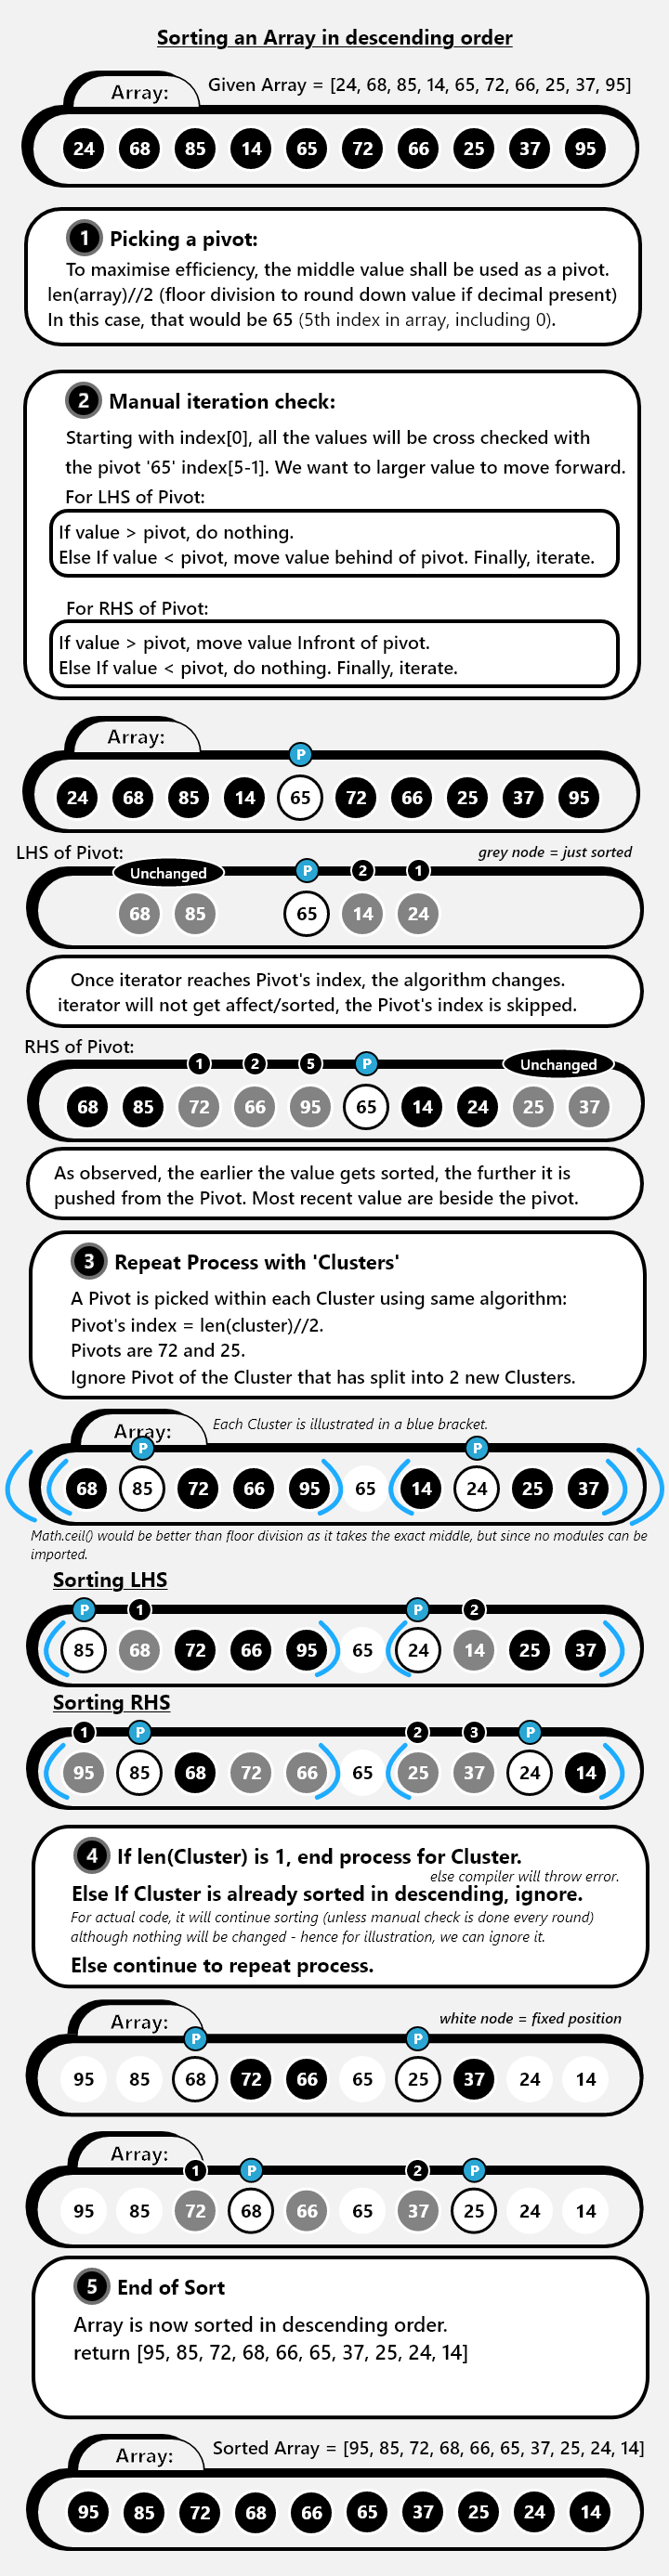

### Making functions, to be used in a Menu:

In [ ]:
def inputSwimmers():
    swimmers = []
    prompt = "Enter lane {} swimmer: "

    for i in range(1, 6):                            # Swimmer 1 - 5; stop at 6, last Swimmer is 5.
        name = input(prompt.format(i))               # concatenate prompts and iteration count to form a sentence
        
        while len(name) == 0:                        # if input is empty, keep looping till name is given before iterating
            name = input(prompt.format(i))          
            
        swimmers.append(name)                        # add name in array

    return swimmers                                  # array with names

In [ ]:
def inputTiming(swimmers):
    i = 0                                                 # define iterator as using while loop
    timings = []                                          # create empty list
    
    while i < len(swimmers):                              # keep looping till iterator == number of Swimmers present
        timing = input("Enter timing for " + swimmers[i] + ": ")
        
        try:
            timings.append(float(timing))                  # try to convert to float
            i += 1                                         # iterate only when timing appended
                                                           # prevent STRINGs
        except:
            print("Invalid Timing: please input a float")  # else prompt an error, but don't iterate for this turn

    return timings

In [ ]:
def printResults(swimmers, timings):
    for i in range(len(swimmers)):                 # dynamic range for code reusability: for more or less than 5 swimmers change
        
        print(f"{swimmers[i]:<21} {timings[i]}s")  # ":<21" adds padding, "s" is units for Timings
        
    print("The Fastest timing is", f"{min(timings)}s")    # Fastest Timing = Minimum Timing

In [ ]:
def printResults2(swimmers, timings):
        
    while len(swimmers) > 0:                           # repeat process till all swimmers have been printed and removed
          
        index = timings.index(min(timings))            # find index of timing by matching against sorted value

        print(f"{swimmers[index]:<21} {timings[index]}s")  # adding units
        
        # remove values once used: to avoid swimmer's name to repeat if they have same timing
        swimmers.pop(index)
        timings.pop(index)

In [ ]:
def main():

    menu = ("""
    1. add swimmer
    2. add timing
    3. print
    4. print2
    5. quit
    """)
    
    while True: 
        print(" ")
        print("Menu", menu)
        entry = input("What is your choice? ")
        
        if entry =='1':
            try:
                print(" ")
                swimmers = inputSwimmers()
            except:
                print("Unexpected Error Occurred!")
                
        elif entry == '2': 
            try:
                print(" ")
                timings = inputTiming(swimmers)
            except:
                print("No Swimmer found!")
                
        elif entry == '3':
            try:
                print(" ")
                printResults(swimmers, timings)
            except:
                print("No Records found!")
            
        elif entry == '4': 
            try:
                print(" ")
                printResults2(swimmers, timings)
            except:
                print("No Records found!")
            
        elif entry == '5':
            print(" ")
            print("End of programme")
            break
            
        else: 
            print(" ")
            print("Unknown Option Selected!") 
            
main()

 
Menu 
    1. add swimmer
    2. add timing
    3. print
    4. print2
    5. quit
    
What is your choice? 3
 
No Records found!
 
Menu 
    1. add swimmer
    2. add timing
    3. print
    4. print2
    5. quit
    
What is your choice? 1
 
Enter lane 1 swimmer: wrvre
Enter lane 2 swimmer: twhb
Enter lane 3 swimmer: e5h
Enter lane 4 swimmer: 5e6h5h
Enter lane 5 swimmer: eh5
 
Menu 
    1. add swimmer
    2. add timing
    3. print
    4. print2
    5. quit
    
What is your choice? 2
 
Enter timing for wrvre: 123
Enter timing for twhb: 11
Enter timing for e5h: 1
Enter timing for 5e6h5h: 13
Enter timing for eh5: 0.9
 
Menu 
    1. add swimmer
    2. add timing
    3. print
    4. print2
    5. quit
    
What is your choice? fwf
 
Unknown Option Selected!
 
Menu 
    1. add swimmer
    2. add timing
    3. print
    4. print2
    5. quit
    
What is your choice? 3
 
wrvre                 123.0s
twhb                  11.0s
e5h                   1.0s
5e6h5h                13.0s
eh5  